<span style="background-color: lightgreen"><font size =6>NLP Topic Modeling</font></span>

**Steps:**<br>
<font size = 5> Part I </font>
* What is topic modeling? Machine Learing? NLP?
* Read Data
* Data Cleaning
* Tokenize
* Stemming

<font size = 5> Part II </font>
* Create the Document-Word matrix
* Build LDA model with sklearn
* Diagnose model performance with perplexity and log-likelihood
* Use GridSearch to determine the best LDA model.
* Dominant topic
* Predict Topics using LDA model
* How to cluster documents that share similar topics and plot?
* Get similar documents for any given piece of text?

# What is AI / Machine Learning?

* Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems
* Machine learning is an application of Artificial Intelligence where we give machines access to data and let them use that data to learn for themselves. It's basically getting a computer to perform a task without explicitly being programmed to do so.

**Machine Learning 
Supervised vs Unsupervised**

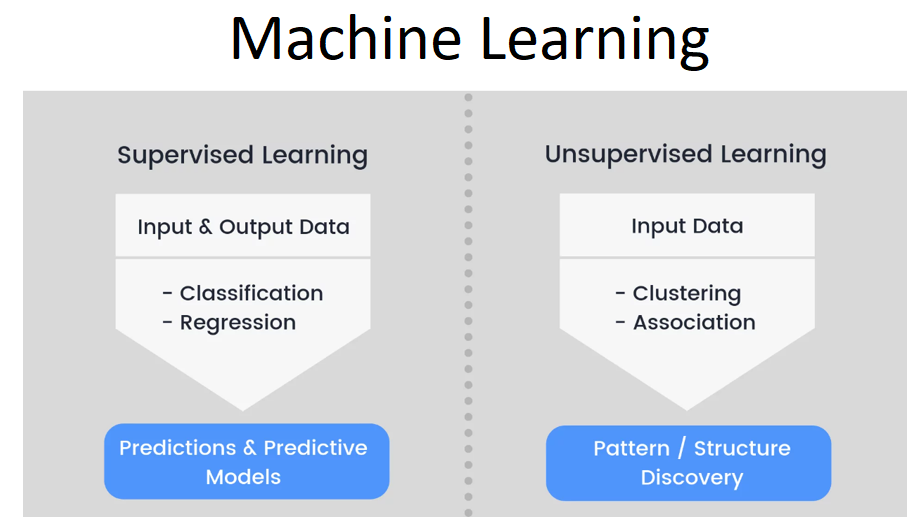

In [1]:
import os
from IPython.display import Image, display, Markdown

DOCUMENTS_PATH = os.getcwd() 
display(Markdown("**Machine Learning \nSupervised vs Unsupervised**"))
display(Image(f"{DOCUMENTS_PATH}/machinelearing.png"))

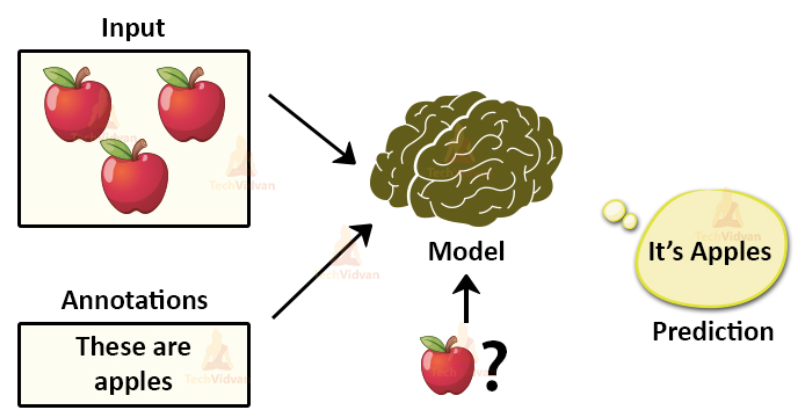

In [2]:
display(Image(f"{DOCUMENTS_PATH}/supervised.png"))

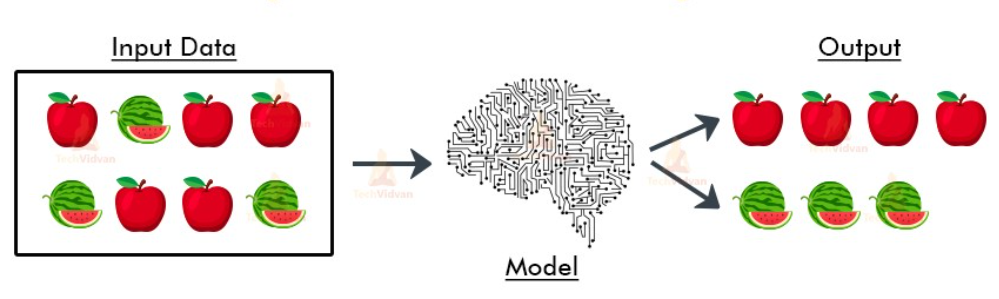

In [3]:
display(Image(f"{DOCUMENTS_PATH}/unsupervised.png"))

`Areas of AI:`
* Machine Learning. 
* Deep learning. 
* Neural Networks. 
* Cognitive Computing. 
* Natural Language Processing. 
* Computer Vision.

# What is NLP?

* Natural language processing (NLP) is the ability of a computer program to understand human language as it is spoken and written -- referred to as natural language.

* Areas:<br>
•	Searching.  
•	Machine translation.  
•	Summarization.  
•	Named-Entity Recognition.  
•	Parts-of-Speech tagging (POS).  
•	Information retrieval.  
•	Information grouping.  
•	Sentiment analysis.  
•	Answering queries.  
•	Automated speech recognition (ASR 


# What is topic modeling?
`https://monkeylearn.com/blog/introduction-to-topic-modeling/`
`https://monkeylearn.com/blog/introduction-to-topic-modeling/`
* Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents
--versus--
* Topic classification models require training, they’re known as ‘supervised’ machine learning techniques. What does that mean? Well, as opposed to text modeling, topic classification needs to know the topics of a set of texts before analyzing them. Using these topics, data is tagged manually so that a topic classifier can learn and later make predictions by itself.

* How Does Topic Modeling Work?
It’s simple, really. Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data. 

# Get Libs

In [62]:
import numpy as np
import pandas as pd
import re
import os
import nltk  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet  
lemmatizer = WordNetLemmatizer()
import gensim
from pathlib import Path

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt 

In [7]:
DOCUMENT_PATH = os.getcwd() 

# Read data

In [14]:
def read_rawdata(file = None):
    """
        read college data
        input: file
        output: tabular pandas
    """
    if not file:
        file = Path(DOCUMENT_PATH, "USCollegesWithSummary.csv")
    df = pd.read_csv(file, error_bad_lines=False) 
    df = df.dropna(subset=["Summary"])
    return df

In [16]:
read_rawdata().head(1)

,Seq,Rank,School_url,College,Town,Wiki,Web,Summary
0,0,1061,/reviews/9107.htm,A.T. Still University,Kirksville ...,https://en.wikipedia.org/wiki/A.T._Still_Unive...,https://www.atsu.edu,"Founded in 1892, A.T. Still University is a n..."


# Data Cleaning

* columns
<br> ['Seq', 'Rank', 'School_url', 'College', 'Town', 'Wiki', 'Web', 'Summary']

In [54]:
def clean_data(df = pd.DataFrame()):
    """
        clean emails and special charaters
        input: df
        output: text data 
    """
    if df.empty:
        df = read_rawdata()
   
    # Convert to list
    data =  df["Summary"].values 
    # Remove Emails
    data = [re.sub(r'\S*@\S*\s?', '', str(sentence)) for sentence in data]
    # Remove new line characters
    data = [re.sub(r'\s+', ' ', sent) for sent in data]
    # Remove distracting single quotes
    data = [re.sub(r"\'", "", sent) for sent in data]
    return data

In [56]:
data = clean_data()
data[234]

'Founded in 1929, Carlow University is a non-profit private higher-education institution located in the urban setting of the medium city of Pittsburgh (population range of 250,000-499,999 inhabitants), Pennsylvania. Officially accredited by the Middle States Commission on Higher Education, Carlow University is a small (uniRank enrollment range: 2,000-2,999 students) coeducational US higher education institution formally affiliated with the Christian-Catholic religion. Carlow University offers courses and programs leading to officially recognized higher education degrees such as bachelor degrees, master degrees in several areas of study. See the uniRank degree levels and areas of study matrix below for further details. This 91 years old US higher-education institution has a selective admission policy based on entrance examinations and students past academic record and grades. The admission rate range is 80-90% making this US higher education organization a least selective institution. I

# Tokenize

* Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded.

In [59]:
# less expensive way: 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations 
        
# regular way
def tokenize(data = []):
    """
        tokenize
        input: cleaned data
        output: tokens
    """
    if not data:
        data = clean_data()
    
    data_words = [gensim.utils.simple_preprocess(str(sentence), deacc=True) 
                  for sentence in data]  # deacc=True removes punctuations
    return data_words
    #data_words = list(sent_to_words(data))
data_words = tokenize()
print(data_words[:1])

[['founded', 'in', 'still', 'university', 'is', 'non', 'profit', 'private', 'specialized', 'higher', 'education', 'institution', 'located', 'in', 'the', 'rural', 'setting', 'of', 'the', 'large', 'town', 'of', 'kirksville', 'population', 'range', 'of', 'inhabitants', 'missouri', 'this', 'institution', 'also', 'has', 'branch', 'campus', 'in', 'mesa', 'officially', 'accredited', 'by', 'the', 'higher', 'learning', 'commission', 'still', 'university', 'atsu', 'is', 'small', 'unirank', 'enrollment', 'range', 'students', 'coeducational', 'us', 'higher', 'education', 'institution', 'still', 'university', 'atsu', 'offers', 'courses', 'and', 'programs', 'leading', 'to', 'officially', 'recognized', 'higher', 'education', 'degrees', 'such', 'as', 'bachelor', 'degrees', 'master', 'degrees', 'doctorate', 'degrees', 'in', 'several', 'areas', 'of', 'study', 'see', 'the', 'unirank', 'degree', 'levels', 'and', 'areas', 'of', 'study', 'matrix', 'below', 'for', 'further', 'details', 'this', 'years', 'old'

# Stemming

* Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

* The advantage of this is, we get to reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns. You can expect better topics to be generated in the end.

In [71]:
porter = PorterStemmer()

In [72]:
def stem_words(texts = []):
    if not texts:
        texts = tokenize()
    texts_out = []
    for sent in texts: 
        texts_out.append(" ".join([ porter.stem(token) for token in sent ]))
    return texts_out

In [74]:
  
data_stemmed = stem_words(data_words)

print(data_stemmed[:2])

['found in still univers is non profit privat special higher educ institut locat in the rural set of the larg town of kirksvil popul rang of inhabit missouri thi institut also ha branch campu in mesa offici accredit by the higher learn commiss still univers atsu is small unirank enrol rang student coeduc us higher educ institut still univers atsu offer cours and program lead to offici recogn higher educ degre such as bachelor degre master degre doctor degre in sever area of studi see the unirank degre level and area of studi matrix below for further detail thi year old us higher educ institut ha select admiss polici base on entranc examin and student past academ record and grade intern student are welcom to appli for enrol atsu also provid sever academ and non academ facil and servic to student includ librari hous sport facil financi aid and or scholarship onlin cours and distanc learn opportun as well as administr servic', 'found in abilen christian univers is non profit privat higher

# Create the Document-Word matrix

In [76]:
def vectorization(data = []):
    
    if not data:
        data = stem_words(texts = [])
        
    vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10, # minimum reqd occurences of a word 
                             stop_words='english', # remove stop words
                             lowercase=True, # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3 
                                 # max_features=50000, # max number of uniq words    
                            )
    data_vectorized = vectorizer.fit_transform(data)
    return data_vectorized                           

In [77]:
data_vectorized = vectorization()

# Build LDA model with sklearn

* Everything is ready to build a Latent Dirichlet Allocation (LDA) model. Let’s initialise one and call fit_transform() to build the LDA model.
* Latent Dirichlet Allocation (LDA) is a popular form of statistical topic modeling. In LDA, documents are represented as a mixture of topics and a topic is a bunch of words. Those topics reside within a hidden, also known as a latent layer. 

* LDA looks at a document to determine a set of topics that are likely to have generated that collection of words. So, if a document uses certain words that are contained in a topic, you could say the document is about that topic.

* Though a topic is composed of words, the likely distribution of those words is not equal. For example, the topic “domesticated animals” may have a probability of 50% dog, 30% cat, 20% goldfish.

* LDA consists of two parts, the words within a document (a known factor) and the probability of words belonging to a topic, which is what needs to be calculated. The algorithm tries to determine, for a given document, how many words belong to a specific topic. Plus it attempts to determine how many documents belong to a specific topic because of a certain word.

In [80]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,  # Number of topics
                                      max_iter=10, # Max learning iterations
                                      learning_method='online',  # Random state
                                      batch_size=128,  # n docs in each learning iter
                                      evaluate_every = -1, # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1)


In [85]:
# a better option:
LatentDirichletAllocation(batch_size=128, 
    doc_topic_prior=None, 
    learning_decay=0.7, 
    learning_method="online", 
    learning_offset=10.0,
    max_doc_update_iter=100, 
    max_iter=10, 
    mean_change_tol=0.001,
    n_components=10, 
    n_jobs=-1,  
    perp_tol=0.1,
    random_state=100, 
    topic_word_prior=None,
    total_samples=1000000.0, 
    verbose=0)

LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)

In [86]:
 
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -977226.8275516862
Perplexity:  95.12769706294029
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [87]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,  perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'n_topics'

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = [“Topic” + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = [“Doc” + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic[‘dominant_topic’] = dominant_topic
# Styling
def color_green(val):
    color = ‘green’ if val > .1 else ‘black’
    return ‘color: {col}’.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return ‘font-weight: {weight}’.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

In [ ]:
Topics = ["Update Version/Fix Crash Problem","Download/Internet Access","Learn and Share","Card Payment","Notification/Support", 
          "Account Problem", "Device/Design/Password", "Language/Recommend/Screen Size", "Graphic/ Game Design/ Level and Coin", "Photo/Search"]
df_topic_keywords["Topics"]=Topics
df_topic_keywords

In [ ]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en', disable=['parser', 'ner'])
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
# Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
# Predict the topic
mytext = ["Very Useful in diabetes age 30. I need control sugar. thanks Good deal"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(infer_topic)

In [ ]:
def apply_predict_topic(text):
    text = [text]
    infer_topic, topic, prob_scores = predict_topic(text = text)
    return(infer_topic)

df["Topic_key_word"]= df['Translated_Review'].apply(apply_predict_topic)
df.head()

# How to cluster documents that share similar topics and plot?

In [ ]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

In [ ]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

#  Get similar documents for any given piece of text?

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
nlp = spacy.load('en', disable=['parser', 'ner'])
def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

In [ ]:
mytext = [“I think they are really helpful”]
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
print(‘\n’, docs[0][:500])
print()

# Use  pyldavis to display

In [ ]:
pip install pyldavis

In [ ]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

* https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6